# SCAM/LES Output Plotting Package
## Set up modules (standard and mine) 

In [4]:
### Import Standard Packages ###

import matplotlib.pyplot as mp
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import metpy.calc as mpc
import metpy.constants as mconst
import xarray as xr
import scipy as spy
import pandas as pd
import datetime as dt

import importlib

### To Import My Functions ###
import scam_fplot as myplt


#### CONSTANTS #####
r_gas = mconst.dry_air_gas_constant.magnitude   # Specific gas constant for dry air
cp_air = mconst.dry_air_spec_heat_press.magnitude # Specific heat for dry air
Lv = mconst.water_heat_vaporization.magnitude       # Latent heat of vaporization

r_cp = r_gas/cp_air    # r/cp
grav = mconst.earth_gravity.magnitude       # Gravity ave.
p0 = mconst.pot_temp_ref_press.magnitude

#%xmode Plain   ## Fortran-like error tracebacks (doesn't seem to work though)

## Add Experiment Set 

In [5]:
''' ###### IOP file info. ###### '''

#case_iop = "PERDIGAO" ; scam_file_nums = ['001','002','003'] ; scam_run_names = ['x01','x02','x03']
case_iop = "SAS" ; scam_file_nums = ['106.norad','106d.norad','LES'] ; scam_run_names = ['CAM6-L32','CAM6-L256','NCAR']
                                     
#case_iop = "RICO" ; scam_file_nums = ['001'] ; scam_run_names = ['RICO1']


''' ########## BASE DIRS ############ '''


#dir_root = '/Users/rneale/Documents/NCAR/PBL/PBL_py_data/' # Mylocal dir.
dir_root = '/Users/rneale/Documents/NCAR/git/'

# Assumes LES data is in $dir_root/LES
# Assumes SCAM data is in #dir_root/history
# Assumes figures (png)will be written to $dir_root/figs

# Data required for baseline cases are here on casper/cheyenne 



## Experimental Namelist Selections

In [6]:
'''Namelist PArameter Selections for Sensitivity Experiments'''

cam_var_select = ['CLUBB_GAMMA']
cam_var_select_values = [0.2,0.5,0.8] 

## Now som logic that would disperse

## SCAM Sensitvity Experiments

In [7]:
''' SCAM BUILD AND RUN SEPARATELY FOR EACH NAMELIST PARAMETER VALUE '''

# create_newcase ....
# ./case-build

## Generate 3 run directories for each value of parameters

# Now some logic to generate 2 case directoriesn and distributes the the namelsist with the separate parameter values.

# ./case-run (x3)

# Extract output for processing in the diagnsotics below.



' SCAM BUILD AND RUN SEPARATELY FOR EACH NAMELIST PARAMETER VALUE '

# Diagnostic Field Selections
## List of variables for each plot type

In [8]:

''' ##### Global Vars. ##### '''

fig_file = True # Need to add this in RBN
fig_screen = True
all_vars_info = False # List all variables that can be plotted in each 'set'


""" ### ### ### ### """
""" ###  1D TS  ### """
""" ### ### ### ### """
#pvars_ts1d = np.array(['PBLH','TS','LHFLX','SHFLX','PRECC','PRECL','FLNS']) # D profile timeseries plots
#pvars_ts1d = np.array(['SHFLX','LHFLX','PBLH','PBLH_DQ'])

pvars_ts1d = np.array(['LHFLX'])



""" ### ### ### ### """
""" ###  2D TS  ### """
""" ### ### ### ### """

## WPSKEW is WP3_CLUBB/WP2_CLUBB**3/2
#pvars_ts2d = ['T','Q','RELHUM','TH','THL','CLOUD','ZMDQ','ZMDT', 
#            'STEND_CLUBB','RVMTEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','WP3_CLUBB','THLP2_CLUBB','WP2_CLUBB'] # 2D profile timeseries plots
#pvars_ts2d = ['DTV','VD01','DCQ','Q','T','TH','THL']
#pvars_ts2d = ['THV','TH','Q','WP2_CLUBB','WP3_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB']
pvars_ts2d = np.array(['Q'])


""" ### ### ### ### ### """
""" ### 1D SNAPSHOT ### """
""" ### ### ### ### ### """

#pvars_ts2d = ['T','Q','RELHUM','TH','THL','CLOUD','ZMDQ','ZMDT','DTCOND','DCQ']\
#pvars_ts2d = ['STEND_CLUBB','RVMTEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','WP2_CLUBB','WP3_CLUBB'] 
    
#pvars_snap = ['TH','THL','Q','RELHUM','DTV','DCQ','STEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','WP2_CLUBB','WP3_CLUBB']
#pvars_snap = ['TH','Q','WP2_CLUBB','WP3_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB']
pvars_snap = np.array(['TH'])

tsnaps = np.array([6.,8.,10.,12.,14.,16.])     # Time of snapshots (local time)


""" ### ### ### ### ### """
""" ### 2D AVERAGE  ### """
""" ### ### ### ### ### """

pvars_av2d = np.array(['Q'])



""" ### ### ### ###  ### """
""" ### PROF BUDGETS ### """  # Not used yet
""" ### ### ### ###  ### """

pvars_budget = np.array(['MOM','TEMP','SHUM'])




""" ### ### ### ### ### """
""" ### ANIMATIONS ###  """ # Not used yet
""" ### ### ### ### ### """
    
pvars_anim = np.array(['Q'])





# File and Array Setups 

In [9]:

''' ####### DERIVED VARS ####### '''

scam_fig_stub=dir_root+'figs/'+case_iop+'_'.join(scam_file_nums)


### Bundle these into array for passing to functions ###
run_info = {}
run_info['pvars_list'] = all_vars_info
run_info['1dvars'] = pvars_ts1d
run_info['2dvars'] = pvars_ts2d
run_info['snapvars'] = pvars_snap

####### GRAPHICS ########
#mp.interactive(True)
#%matplotlib qt
%matplotlib inline


### Change List to np array ### 

scam_file_nums = np.array(scam_file_nums) 
scam_run_names = np.array(scam_run_names) 


### Bundle run info ###
run_info['Case IOP']   = case_iop
run_info['Run Name']   = scam_run_names
run_info['File Num']   = scam_file_nums
run_info['Fig Out']   = fig_file
run_info['Stub Figs']  = scam_fig_stub
run_info['Snap Times']  = tsnaps
run_info['Dir Root'] = dir_root

### Bundle some options ###
run_info['Var List'] = all_vars_info




# Plot type selection 

+++ IMPORTING PLOT FUNCTIONS +++
+++ IMPORTING UTILS FUNCTIONS +++
+++ IMPORTING VAR DEFINITION FUNCTIONS +++

SAS  - 1D PLOTTING VARIABLES
--  LHFLX  ---- PLOTTING 1D TIME PLOTS ------>>>   Latent Heat Flux
/Users/rneale/Documents/NCAR/git/history/FSCAM.T42_T42.SAS.106.norad.cam.h0*00.nc
 -->  106.norad  --  CAM6-L32  -- ymin/ymax -->  0.0 375.1466979980469  <-- 
/Users/rneale/Documents/NCAR/git/history/FSCAM.T42_T42.SAS.106d.norad.cam.h0*00.nc
 -->  106d.norad  --  CAM6-L256  -- ymin/ymax -->  0.0 375.1466979980469  <-- 
 -->  LES  --  NCAR  -- ymin/ymax -->  0.0 375.1096545108171  <-- 



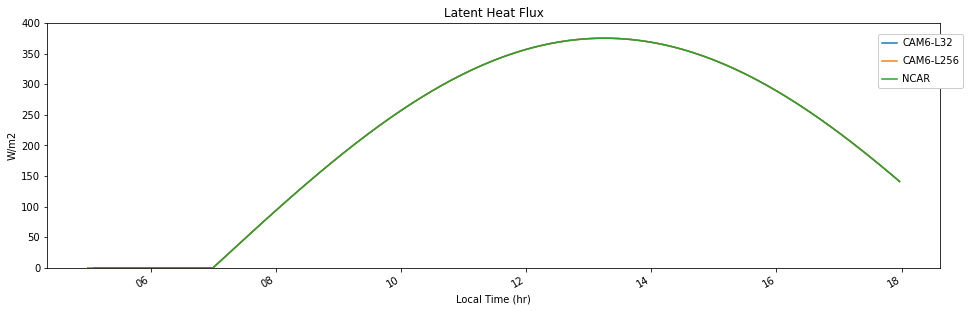



SAS  - 2D PLOTTING VARIABLES
/Users/rneale/Documents/NCAR/git/history/FSCAM.T42_T42.SAS.106.norad.cam.h0*00.nc


---- PLOTTING 2D TIME/HEIGHT PLOTS ------ >>>  
 -  Q  -  Specific humidity  -- cmin/cmax -->  1.0 12.0
 -->  CAM6-L32  --  106.norad  --  5.6155296e-11 0.0118026715
/Users/rneale/Documents/NCAR/git/history/FSCAM.T42_T42.SAS.106d.norad.cam.h0*00.nc
 -->  CAM6-L256  --  106d.norad  --  5.6155296e-11 0.0118026715
 -->  NCAR  --  LES  --  5.6155296e-11 0.0118026715



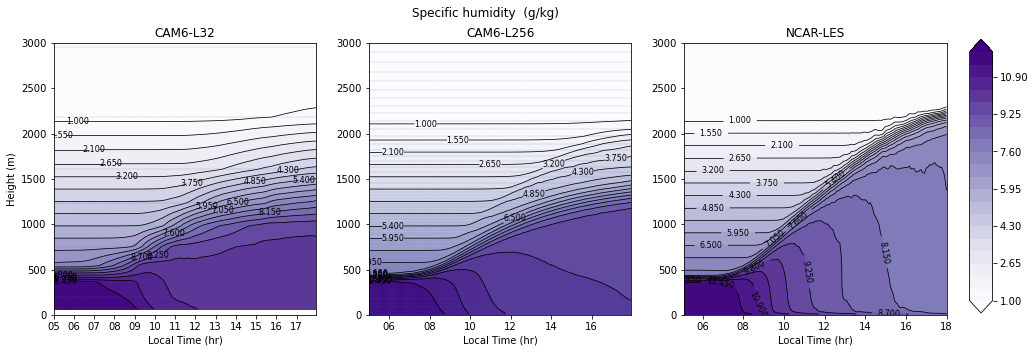

In [10]:
importlib.reload(myplt) # Required because I am constantly editing scam_func.py

''' ###### PLOT SETS ###### '''

myplt.plot1d_ts_scam(run_info)   # 1D time series plots
myplt.plot2d_ts_scam(run_info)   # 2D time series plots

#myplot.plot1d_snap_scam(run_info)   # 1D snapshot plots
#myplot.plot1d_anim_scam(run_info) # 2D profile animation plots

## New plot sets
#myplot.plot1d_mean_scam(run_info)   # 1D mean profiles
#myplot.plot1d_budget_scam(run_info)   # 1D mean profiles

